### **Logistic Regression**
* for binary classification problems

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import math

### **Data prep**

* I am going to use the make_classification dataset from scikit learn for this task and do all of it in numpy
* keeping the noise zero here to see if model actually converges

In [3]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, 
                           n_redundant=0, n_classes=2, random_state=42)

y = np.expand_dims(y, axis = 1)
print(f"X shape: {X.shape}") ### 2 features per sample
print(f"y shape: {y.shape}") ### 1 for binary class
print(f"X size: {X.size}")
print(f"y size: {y.size}")


X shape: (500, 2)
y shape: (500, 1)
X size: 1000
y size: 500


* Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [5]:
print(f"X train : {len(X_train)}")
print(f"y train : {len(y_train)}")
print(f"y test : {len(X_test)}")
print(f"y test : {len(y_test)}")

X train : 400
y train : 400
y test : 100
y test : 100


### visualize the data


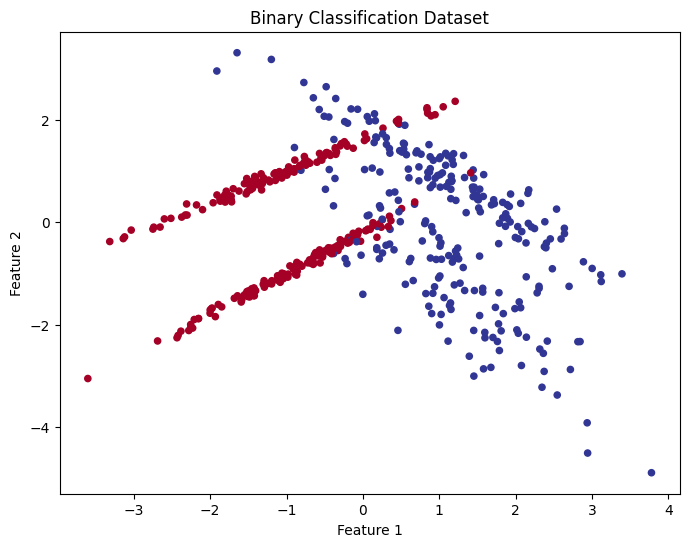

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y[:,0], cmap=plt.cm.RdYlBu, s=20)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary Classification Dataset")
plt.show()

### **Logistic Regression Model** 

In [12]:
class LogisticRegressionModel:
    def __init__(self):

        #randomly initialize
        self.weights = np.random.randn(X.shape[1],1).astype(float) #(2,1) [X SHAPE WAS THIS -> (N,2)]
        self.bias = np.random.randn(1).astype(float) #SCALAR
    
    def sigmoid(self,z):
        return 1/(1+ np.exp(-z))

    def forward(self, X:np.ndarray) -> np.ndarray:
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def __call__(self, x:np.ndarray) -> np.ndarray:
        return self.forward(x)
    
    def parameters(self):
        return [self.weights,self.bias]

    def step(self,X, y, lr =0.01):

        #forward pass
        y_pred = self.forward(X)

        #compute loss
        eps = 1e-10
        y_pred = np.clip(y_pred,eps,1-eps)
        loss = -np.mean(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))

        #number of samples
        N = X.shape[0] ### 400 here

        # gradients
        dw = (1/N) * np.dot(X.T,(y_pred-y))  # shape (n_features,1)
        db = (1/N) * np.sum(y_pred - y)

        #update params
        self.weights -= lr * dw
        self.bias -= lr * db

        return loss


    

### **Instiantiate model and train it**

In [14]:
model = LogisticRegressionModel()
for params in model.parameters():
    print(f"shape : {params.shape}")

shape : (2, 1)
shape : (1,)


In [ ]:
epochs = 10000
for epoch in range(epochs):
    loss = model.step(X_train, y_train, lr = 0.01)
    if epoch % 100 == 0:
        print(f" Epoch : {epoch } |Loss : {loss}")

In [35]:
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # make a meshgrid over feature space
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # stack grid points into shape (N,2)
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # get predictions for each point on grid
    probs = model(grid)
    probs = probs.reshape(xx.shape)
    
    # plot contour
    plt.contourf(xx, yy, probs, levels=[0,0.5,1], alpha=0.3, cmap=plt.cm.RdYlBu)
    
    # plot actual points
    plt.scatter(X[:,0], X[:,1], c=y[:,0], cmap=plt.cm.RdYlBu, s=20, edgecolor="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()


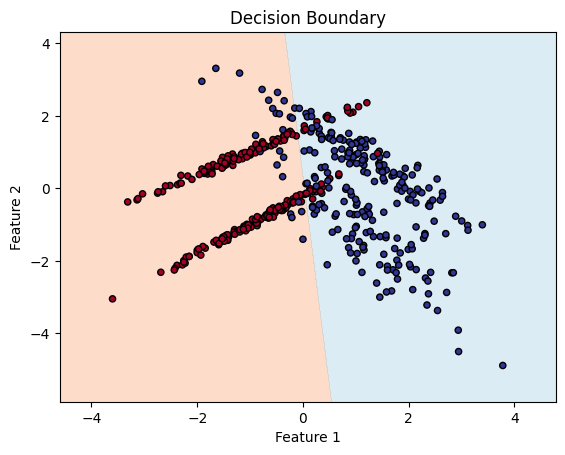

In [36]:
plot_decision_boundary(model, X, y)

In [37]:
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # make a meshgrid over feature space
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # stack grid points into shape (N,2)
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # get predictions for each point on grid
    probs = model(grid)
    probs = probs.reshape(xx.shape)
    
    # plot contour
    plt.contourf(xx, yy, probs, levels=[0,0.5,1], alpha=0.3, cmap=plt.cm.RdYlBu)
    
    # plot actual points
    plt.scatter(X[:,0], X[:,1], c=y[:,0], cmap=plt.cm.RdYlBu, s=20, edgecolor="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()


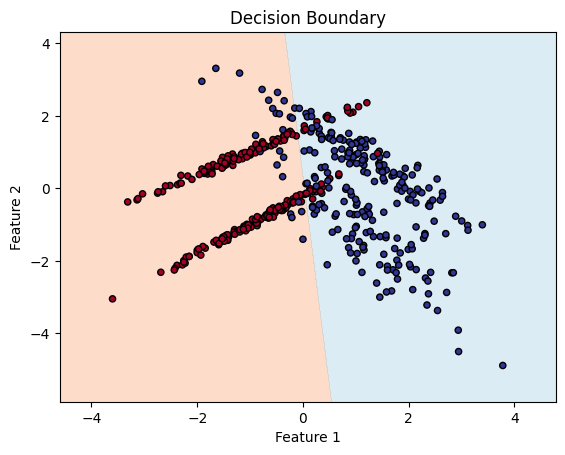

In [38]:
plot_decision_boundary(model,X,y)